In [1]:
import nltk
import re
import numpy as np

In [2]:
# Opening the text  file in read mode
with open("output.txt", 'r') as file:
    data = file.read()

In [3]:
dataset = nltk.sent_tokenize(data)
for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

In [8]:
# dataset


In [4]:
# Bag of Words model
word2count = {}
for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [6]:
# word2count

In [11]:
import heapq
freq_words = heapq.nlargest(100, word2count, key=word2count.get)
# freq_words

In [14]:
X = []
for data in dataset:
    vector = []
    for word in freq_words:
        if word in nltk.word_tokenize(data):
            vector.append(1)
        else:
            vector.append(0)
    X.append(vector)
X = np.asarray(X)
X

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

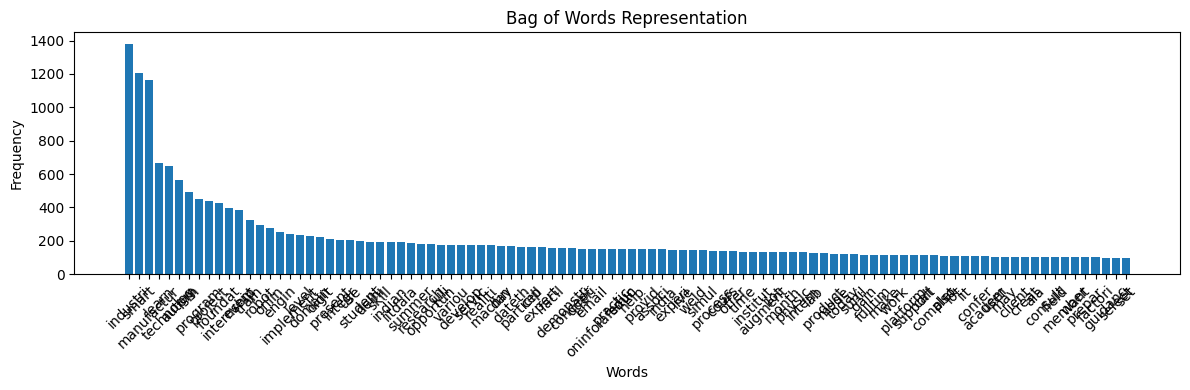

In [19]:
import matplotlib.pyplot as plt

# Calculate the total frequency of each word
word_frequency = [word2count[word] for word in freq_words]

# Plotting the bar chart
plt.figure(figsize=(12, 4))
plt.bar(range(len(freq_words)), word_frequency)
# plt.imshow(X,cmap='binary',aspect='auto')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(range(len(freq_words)), freq_words, rotation=45)
plt.title('Bag of Words Representation')
plt.tight_layout()
plt.show()

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
# One-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_words = encoder.fit_transform(np.array(freq_words).reshape(-1, 1))

C:\Users\Zainab\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
Y = []
for data in dataset:
    vector = []
    words = nltk.word_tokenize(data)
    for word in freq_words:
        if word in words:
            index = freq_words.index(word)
            vector.extend(encoded_words[index])
        else:
            vector.extend([0] * len(encoded_words[0]))
    Y.append(vector)

In [24]:
Y = np.asarray(Y)
print(Y)

[[0. 0. 0. ... 0. 0. 0.]]
